In [7]:
fred_api_key = "f1578e7f7117865b1306f5c8a89d2e4e"

In [2]:
from fredapi import Fred
import os
from dotenv import load_dotenv



/Users/varunchowdary/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varunchowdary/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [4]:
# Load environment variables from .env file
load_dotenv()
api_key = os.getenv("FRED_API_KEY", fred_api_key)
print(f"Using FRED API key: {api_key}")

NameError: name 'fred_api_key' is not defined

In [40]:
def get_yields():
    fred = Fred(api_key=api_key)
    terms = {
        "1M": "DGS1MO",
        "3M": "DGS3MO",
        "1Y": "GS1",
        "5Y": "GS5",
        "10Y": "GS10",
        "30Y": "GS30"
    }
    print("Fetching yields from FRED...")
    yield_curve = {k: fred.get_series(v).iloc[-1] for k, v in terms.items()}
    print("Yields fetched successfully.")
    return yield_curve
    

In [23]:
get_yields()

Fetching yields from FRED...
Yields fetched successfully.


{'1M': 4.26, '3M': 4.44, '1Y': 4.09, '5Y': 4.02, '10Y': 4.42, '30Y': 4.9}

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
def plot_yield_curve(yield_curve):
    current_date = datetime.today().strftime('%Y-%m-%d')
    plt.style.use('seaborn-darkgrid')
    colors = plt.get_cmap('tab10')
    terms = list(yield_curve.keys())
    yields = list(yield_curve.values())

    plt.figure(figsize=(10, 6))
    plt.plot(terms, yields, marker='o')
    plt.title('US Treasury Yield Curve')
    plt.xlabel('Maturity')
    plt.ylabel('Yield (%)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Fetching yields from FRED...
Yields fetched successfully.


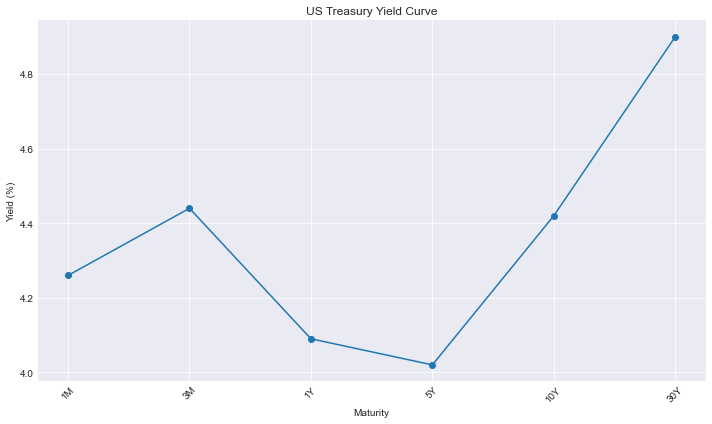

In [41]:
plot_yield_curve(get_yields())

In [29]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/yields")
def read_yields():
    return get_yields()
